In [3]:
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image  # Import the PIL library
import pandas as pd
import json
import pandas as pd


In [19]:
# use GET https://bymykel.github.io/CSGO-API/api/en/skins.json instead
data = pd.read_json('https://bymykel.github.io/CSGO-API/api/en/skins.json')

In [17]:
data.reset_index(inplace=True)

In [22]:
# create pandas of weapon[name], pattern[name], rarity[name], image
df = pd.DataFrame(columns=['weapon', 'pattern', 'rarity', 'image'])

for i in range(len(data)):
    try:
        df.loc[i] = [data.iloc[i]['weapon']['name'], data.iloc[i]['pattern']['name'], data.iloc[i]['rarity']['name'], data.iloc[i]['image']]
    except:
        if (data.iloc[i]['id'] in ("skin-vanilla-weapon")):
            print("Skipped" + data.iloc[i]['id'])

In [23]:
# create enum dict to map grades
grade_dict = {
    "Consumer Grade": 1,
    "Industrial Grade": 2,
    "Mil-Spec": 3,
    "Restricted": 4,
    "Classified": 5,
    "Covert": 6,
    "Contraband": 7
}

In [24]:
# map the grades
df['rarity'] = df['rarity'].map(grade_dict)

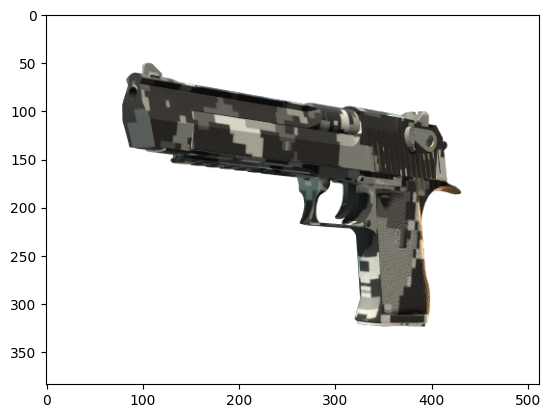

In [25]:
# Plot an image of the skin
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request
import numpy as np

url = df['image'][0]
filename, headers = urllib.request.urlretrieve(url)

img = mpimg.imread(filename)

plt.imshow(img)
plt.show()


In [76]:
for weapon in df['weapon'].unique():
    weapon_df = df[df['weapon'] == weapon]
    weapon_df = weapon_df.sort_values(by=['rarity'], ascending=False)
    try:
        columns = len(weapon_df) // 5
    except:
        columns = 1

    fig, axs = plt.subplots(columns,5, figsize=(150,150))

    # plot each image
    for i, ax in enumerate(axs.flatten()):
        try:
            url = weapon_df['image'].iloc[i]
            filename, headers = urllib.request.urlretrieve(url)
            # open img as a pil
            img = Image.open(filename)
            ax.imshow(img)
            ax.set_title(weapon_df['pattern'].iloc[i], size = 120)
            ax.axis('off')
        except:
            print("Error")
            ax.axis('off')
            
    # Adjust the size of subplots
    fig.subplots_adjust(wspace=0.2, hspace=0.1)  # Reduce the spacing

    plt.savefig(weapon + ".png", bbox_inches='tight')

C:\Users\commo\AppData\Local\Temp\ipykernel_9280\1514757007.py:27: UserWarning: Glyph 22769 (\N{CJK UNIFIED IDEOGRAPH-58F1}) missing from current font.
  plt.savefig(weapon + ".png", bbox_inches='tight')
C:\Users\commo\AppData\Local\Temp\ipykernel_9280\1514757007.py:27: UserWarning: Glyph 24336 (\N{CJK UNIFIED IDEOGRAPH-5F10}) missing from current font.
  plt.savefig(weapon + ".png", bbox_inches='tight')
C:\Users\commo\AppData\Local\Temp\ipykernel_9280\1514757007.py:27: UserWarning: Glyph 40845 (\N{CJK UNIFIED IDEOGRAPH-9F8D}) missing from current font.
  plt.savefig(weapon + ".png", bbox_inches='tight')
C:\Users\commo\AppData\Local\Temp\ipykernel_9280\1514757007.py:27: UserWarning: Glyph 29579 (\N{CJK UNIFIED IDEOGRAPH-738B}) missing from current font.
  plt.savefig(weapon + ".png", bbox_inches='tight')
